In [76]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [77]:
Data=pd.read_excel("/content/ENB2012_data.xlsx")
Data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**Data Set Information:**

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ
with respect to the glazing area, the glazing area distribution, and the orientation, amongst other
parameters.

 We simulate various settings as functions of the afore-mentioned characteristics to obtain
768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real
valued responses.

 It can also be used as a multi-class classification problem if the response is rounded
to the nearest integer.

**Attribute Information**:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or
outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two
responses.

Specifically:

X1 Relative Compactness  

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load - Target

y2 Cooling Load - Target

In [78]:
# Assinging names columns names for our convienence
Data.columns= ["Relative Compactness(X1)", "Surface Area(X2)", "Wall Area(X3)", 
               "Roof Area(X4)", "Overall Height(X5)", "Orientation(X6)", 
               "Glazing Area(X7)", "Glazing Area Distribution(X8)", 
               "Heating Load(Y1)", "Cooling Load(Y2)"]

In [79]:
Data.columns

Index(['Relative Compactness(X1)', 'Surface Area(X2)', 'Wall Area(X3)',
       'Roof Area(X4)', 'Overall Height(X5)', 'Orientation(X6)',
       'Glazing Area(X7)', 'Glazing Area Distribution(X8)', 'Heating Load(Y1)',
       'Cooling Load(Y2)'],
      dtype='object')

In [80]:
Data.head()

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8),Heating Load(Y1),Cooling Load(Y2)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [81]:
#Describing the dataset
Data.describe()

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8),Heating Load(Y1),Cooling Load(Y2)
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [82]:
#check for null values
Data.isnull().sum()

Relative Compactness(X1)         0
Surface Area(X2)                 0
Wall Area(X3)                    0
Roof Area(X4)                    0
Overall Height(X5)               0
Orientation(X6)                  0
Glazing Area(X7)                 0
Glazing Area Distribution(X8)    0
Heating Load(Y1)                 0
Cooling Load(Y2)                 0
dtype: int64

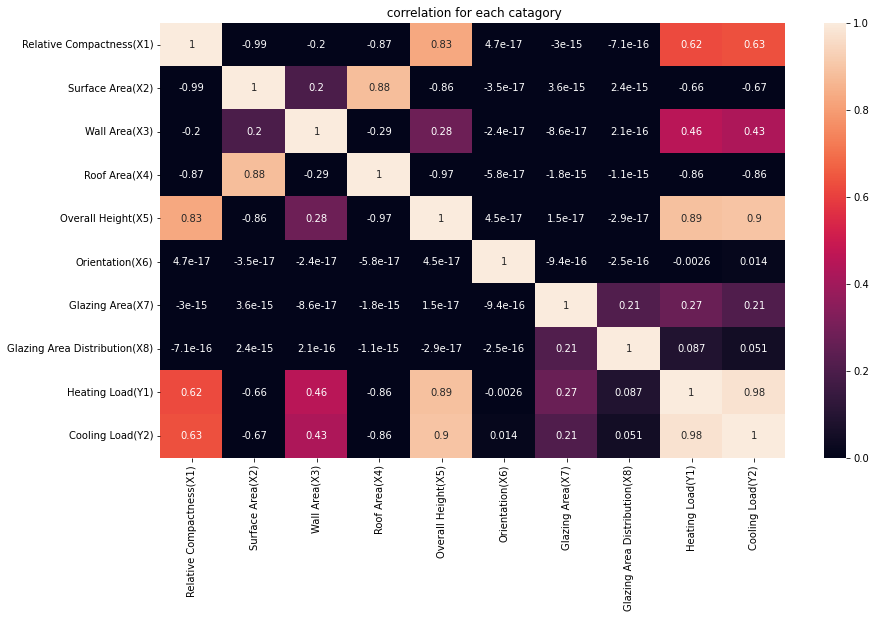

In [83]:
# visualize correlation of data
#fig_size = (14,8)
corr = Data.corr()
plt.figure(figsize= (14,8))
plt.title(" correlation for each catagory")
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fd781eb90>,
      dtype=object)

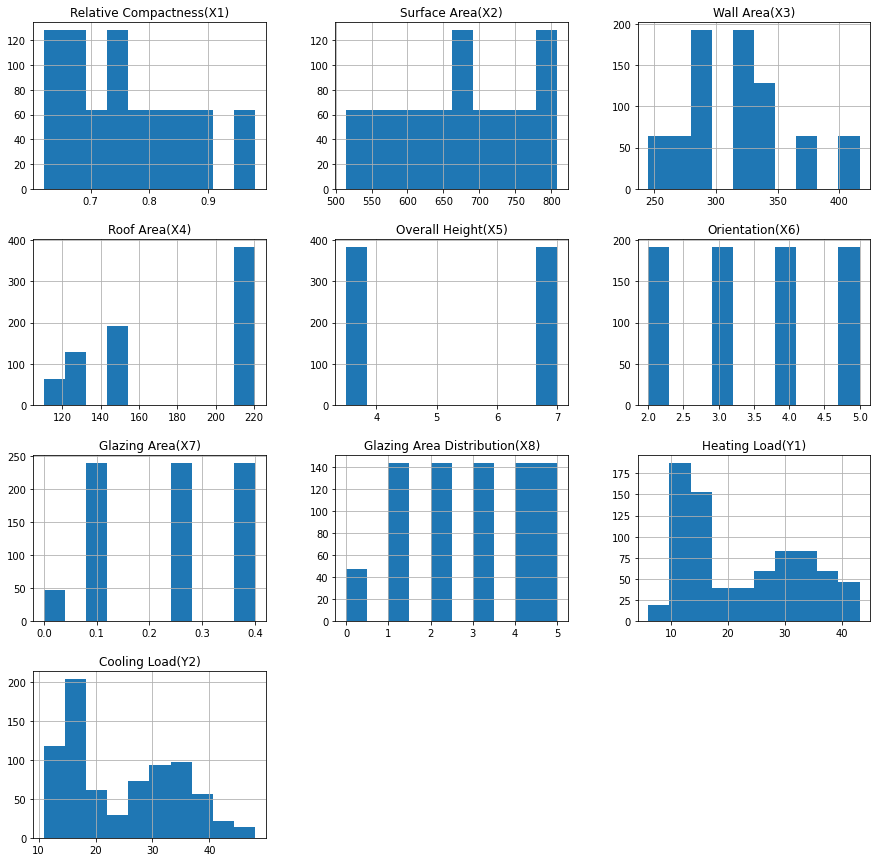

In [84]:
Data.hist(figsize=(15,15))

In [85]:
#assigning values to x and y
y = Data.iloc[:,8:]
X = Data.iloc[:,:8]


In [86]:
X.head(10)

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0


In [87]:
y.head(10)

,Heating Load(Y1),Cooling Load(Y2)
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
5,21.46,25.38
6,20.71,25.16
7,19.68,29.60
8,19.50,27.30
9,19.95,21.97


In [88]:
# assigning multivariant variables to x1 to y1
x1 = y.iloc[:,:1]
y1 = y.iloc[:,1:]

In [89]:
x1.head()

,Heating Load(Y1)
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84


In [90]:
y1.head()


,Cooling Load(Y2)
0,21.33
1,21.33
2,21.33
3,21.33
4,28.28


In [91]:
#splitting data to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1, y_train2, y_test2 = train_test_split(X, y1, x1, test_size=0.2, random_state=0)

In [92]:
print(f"""
X_train shape: {X_test.shape},
y_train shape:{y_train1.shape},
X_test shape:{X_test.shape},
y_test shape:{y_test1.shape}
""")


X_train shape: (154, 8),
y_train shape:(614, 1),
X_test shape:(154, 8),
y_test shape:(154, 1)



In [93]:
X_train.head()

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8)
603,0.74,686.0,245.0,220.5,3.5,5,0.40,2
118,0.76,661.5,416.5,122.5,7.0,4,0.10,2
247,0.90,563.5,318.5,122.5,7.0,5,0.10,5
157,0.82,612.5,318.5,147.0,7.0,3,0.10,3
468,0.66,759.5,318.5,220.5,3.5,2,0.25,4


#Feature Scaling

#standard Scaler

In [94]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [95]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7
0,-0.971851,0.978553,-0.002780,0.957784,-0.983844,-0.438156,1.231324,0.125603
1,-0.210976,0.142904,-1.709544,0.957784,-0.983844,0.464621,-1.026614,-0.522464
2,0.264572,-0.414195,0.566142,-0.675770,1.016421,-0.438156,-1.026614,-0.522464
3,0.549900,-0.692745,-0.002780,-0.675770,1.016421,0.464621,-1.779260,-1.818599
4,2.071651,-1.806944,-0.571701,-1.492547,1.016421,-0.438156,1.231324,-1.170532


#Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error 

# create linear regression object
reg = LinearRegression()
 
# train the model using the training sets
reg1 = reg.fit(X_train, y_train1)
reg2 = reg.fit(X_train, y_train2)
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)

In [97]:
y_pred = reg.predict(X_test)
y_pred

array([[17.41298133],
       [ 8.00978042],
       [29.43546452],
       [25.82879215],
       [31.09158541],
       [27.45518789],
       [28.25886033],
       [34.11386677],
       [29.37714783],
       [28.49020798],
       [ 6.97404524],
       [35.19788581],
       [11.76842685],
       [35.37843968],
       [35.85741423],
       [26.58621412],
       [ 9.43401151],
       [27.29552971],
       [15.97682996],
       [12.28763228],
       [13.15602516],
       [31.2512436 ],
       [ 9.49669856],
       [32.42784778],
       [ 5.68857664],
       [15.25911986],
       [13.00534237],
       [14.4735215 ],
       [ 9.11469514],
       [32.90682234],
       [13.20679193],
       [14.42059807],
       [35.55899355],
       [14.26093988],
       [28.4394142 ],
       [36.94436288],
       [14.15420513],
       [37.26367925],
       [18.46934298],
       [ 9.73967027],
       [11.47000617],
       [32.38605641],
       [15.766405  ],
       [31.23935032],
       [24.00838102],
       [25

In [98]:
# Accuracy checking
from sklearn.metrics import mean_squared_error,r2_score
print('RMSE: ',np.sqrt(mean_squared_error(y_test1,y_pred)))
print('RMSE: ',np.sqrt(mean_squared_error(y_test2,y_pred)))

RMSE:  4.1123188156926815
RMSE:  3.1777209043097896


In [99]:

print('R2_score: ',r2_score(y_test1,y_pred))
print('R2_score: ',r2_score(y_test2,y_pred))

R2_score:  0.8202003034637178
R2_score:  0.9085551832835093


#RandomForest

In [100]:
#random forest
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, y_train1)
grid_search.best_params_


{'max_depth': 6, 'max_features': 4, 'max_leaf_nodes': 8}

In [101]:
rf = RandomForestRegressor(max_depth= 4, max_features=6, max_leaf_nodes=8, random_state=10).fit(X_train, y_train1)
print('Accuracy of RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, y_train1)))
print('Accuracy of Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, y_test1)))

Accuracy of RF Regressor on training set: 0.94
Accuracy of Rf Regressor on test set: 0.94


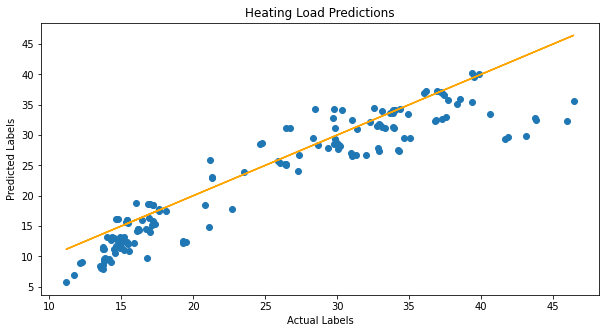

In [102]:
#plotting
plt.figure(figsize = (10,5))
plt.scatter(y_test1,pred1)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Heating Load Predictions")
plt.plot(y_test1,y_test1,color = 'orange')
plt.show()

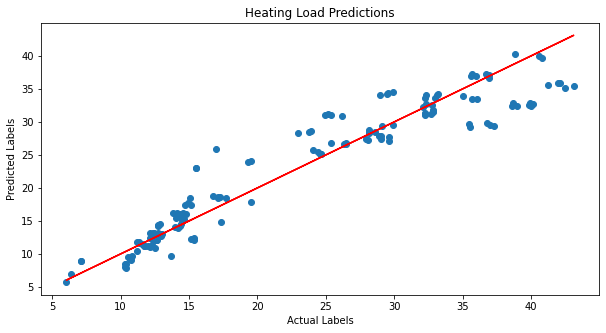

In [103]:
plt.figure(figsize = (10,5))
plt.scatter(y_test2,pred2)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Heating Load Predictions")
plt.plot(y_test2,y_test2,color = 'red')
plt.show()

 KNeighborsRegressor



In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, y_train1)
grid_search.best_params_

{'n_neighbors': 4}

In [105]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train1)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train1)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test1)))

Accuracy of Knn Regressor on training set: 0.94
Accuracy of Knn Regressor on test set: 0.92


#DecisionTree

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train2)
grid_search.best_params_

{'max_depth': 8}

In [107]:
dt = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train2)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train2)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test2)))

Accuracy of DT Regressor on training set: 0.9992458192343068
Accuracy of Dt Regressor on test set: 0.9967089881695489


Linear Regression :  0.91

KNN Regressor : 0.92

Lasso :  0.91

Decision Tree : 0.9966

RandomForest_:0.94

In [108]:
Reg_final = DecisionTreeRegressor(random_state=0)
Reg_final.fit(X_train,y_train1)
print(Reg_final.score(X_test,y_test1))

0.928993799659782


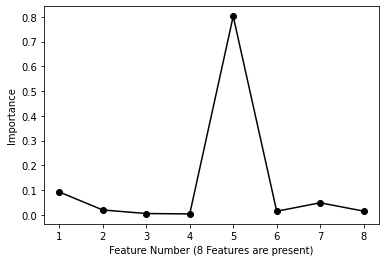

In [109]:
#importance of features
x = [1,2,3,4,5,6,7,8]
y = Reg_final.feature_importances_
plt.xlabel('Feature Number (8 Features are present)')
plt.ylabel('Importance')
plt.plot(x,y, marker = 'o', color = 'black')
plt.show()